In [1]:
import numpy as np
import sys
sys.path.append("..")
from EnsemblePursuitModule.EnsemblePursuit import EnsemblePursuit
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [2]:
def simulate_data(nr_components,nr_timepoints,nr_neurons):
    k=5
    theta=1./5
    zeros_for_U=np.random.choice([0,1], nr_neurons*nr_components, p=[1-0.01, 0.01]).reshape((nr_neurons,nr_components))
    U=np.random.gamma(shape=k,scale=theta,size=(nr_neurons,nr_components))
    U=U*zeros_for_U
    V=np.random.normal(loc=0,scale=1,size=(nr_components,nr_timepoints))
    X=U@V
    #X=zscore(X,axis=1)
    U_orig=U
    V_orig=V
    plt.hist(np.sum(zeros_for_U,axis=0))
    plt.show()
    return X

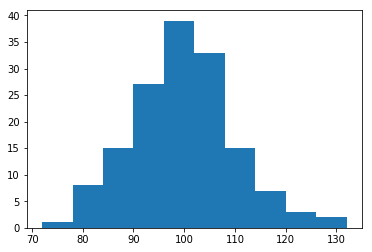

In [3]:
X=simulate_data(150,5000,10000)

In [4]:
print(X.shape)
print(X)
print(X.T.shape)

(10000, 5000)
[[-0.81723636  0.18662926  0.94243023 ... -1.55605813  1.08196527
  -1.0136667 ]
 [ 1.71673881  0.27956299 -1.40802497 ... -2.55921799 -0.3226312
  -0.43800178]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.59346172 -0.1213736  -0.19660307 ...  0.32912127  0.36880022
   0.84250605]
 [-0.22789442 -0.07869093 -0.0613602  ... -0.04288164 -0.22089976
   1.34106405]
 [-1.95858325 -0.90035394 -3.41568188 ...  0.85362299  1.74976198
  -0.37707182]]
(5000, 10000)


In [11]:
ep=EnsemblePursuit(n_components=150,lam=0.01, n_Kmeans = 150)
U,V=ep.fit(X.T)

TypeError: __init__() got an unexpected keyword argument 'n_Kmeans'

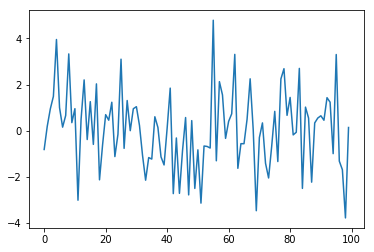

In [6]:
plt.plot(X[0,:100])

(10000, 5000)


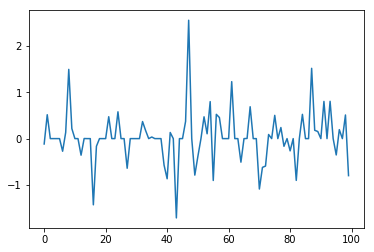

In [7]:
approx=U@V.T
print(approx.shape)
plt.plot(approx.T[0,:100])

In [8]:
from scipy import io
dat=io.loadmat('/home/maria/Documents/EnsemblePursuit/experiments/natimg2800_M170717_MP034_2017-09-11.mat')['stim'][0]['resp'][0]

FileNotFoundError: [Errno 2] No such file or directory: '/home/maria/Documents/EnsemblePursuit/experiments/natimg2800_M170717_MP034_2017-09-11.mat'

In [ ]:
print(dat.shape)
dat=zscore(dat,axis=0)

In [ ]:
plt.plot(dat[:100,0])